In [16]:
import pandas as pd

# قراءة الملف باستخدام مكتبة pandas
df = pd.read_excel('saudischools1442h.xlsx')

# عرض أول 5 صفوف
df.head()


,المنطقة الإدارية,إدارة التعليم,مكتب التعليم,السلطة,المرحلة,نوع المدرسة,جنس المدرسة,جملة طلاب,جملة طلاب سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,خدم,عمال
0,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,البديعة,حكومي,التعليم المستمر,تعليم الكبار,بنات,826,797,0,0,0,0,0,0
1,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,البديعة,حكومي,المرحلة الإبتدائية,تحفيظ,بنات,1040,1038,72,72,41,41,3,0
2,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,البديعة,حكومي,المرحلة الإبتدائية,تربية خاصة,بنات,190,178,123,123,10,10,0,1
3,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,البديعة,حكومي,المرحلة الإبتدائية,نهاري,بنات,34668,32512,1843,1843,1152,1152,27,55
4,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,البديعة,حكومي,المرحلة الثانوية,تحفيظ,بنات,285,285,41,41,0,0,0,1


In [18]:
# ================================
# خلية 3: توحيد أسماء الأعمدة (عربي)
# ================================
# إزالة فراغات حول أسماء الأعمدة
df.columns = df.columns.str.strip()

# قاموس مرادفات لأعمدة شائعة
aliases = {
    "الاسم": ["اسم الطالب", "اسم", "الطالب", "Student Name", "Name"],
    "الصف": ["الصف الدراسي", "صف", "فصل", "الشعبة", "Grade", "Class"],
    "المرحلة": ["المرحلة الدراسية", "مرحلة", "Stage", "School Stage"],
    "الجنس": ["النوع", "ذكر/أنثى", "نوع", "Sex", "Gender"],
    "تاريخ الميلاد": ["ميلاد", "تاريخ الميلاد (ميلادي)", "DOB", "Birth Date", "تاريخ-ميلاد"],
}

# خريطة إعادة التسمية المباشرة إذا كانت الأعمدة أصلاً بالعربية لكن صياغتها مختلفة
rename_map = {}

def match_and_rename(columns, aliases_dict):
    rename_map_local = {}
    for std_col, alts in aliases_dict.items():
        for col in columns:
            c_norm = col.strip().lower().replace("ـ", "").replace("_", " ")
            if c_norm == std_col.lower():
                rename_map_local[col] = std_col
            else:
                for alt in alts:
                    if c_norm == alt.strip().lower():
                        rename_map_local[col] = std_col
                        break
    return rename_map_local

rename_map.update(match_and_rename(df.columns, aliases))

# تطبيق إعادة التسمية
df = df.rename(columns=rename_map)

print("أسماء الأعمدة بعد التوحيد:")
print(df.columns.tolist())


أسماء الأعمدة بعد التوحيد:
['المنطقة الإدارية', 'إدارة التعليم', 'مكتب التعليم', 'السلطة', 'المرحلة', 'نوع المدرسة', 'جنس المدرسة', 'جملة طلاب', 'جملة طلاب سعودي', 'جملة معلمين', 'جملة معلمين سعودي', 'جملة إداريون', 'جملة إداري سعودي', 'خدم', 'عمال']


In [34]:
# التحقق من أسماء الأعمدة ونوع كل عمود
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   المنطقة الإدارية   5597 non-null   object
 1   إدارة التعليم      5597 non-null   object
 2   مكتب التعليم       5597 non-null   object
 3   السلطة             5597 non-null   object
 4   المرحلة            5597 non-null   object
 5   نوع المدرسة        5597 non-null   object
 6   جنس المدرسة        5597 non-null   object
 7   جملة طلاب          5597 non-null   int64 
 8   جملة طلاب سعودي    5597 non-null   int64 
 9   جملة معلمين        5597 non-null   int64 
 10  جملة معلمين سعودي  5597 non-null   int64 
 11  جملة إداريون       5597 non-null   int64 
 12  جملة إداري سعودي   5597 non-null   int64 
 13  خدم                5597 non-null   int64 
 14  عمال               5597 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 656.0+ KB


In [36]:
# إحصاءات وصفية للبيانات الرقمية
df.describe()


,جملة طلاب,جملة طلاب سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,خدم,عمال
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,1110.124352,937.057352,89.510988,83.561015,19.459175,19.268537,0.634983,1.681972
std,2950.990275,2480.641308,192.359535,189.179791,66.800341,66.759720,2.828025,5.574595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,25.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,112.000000,17.000000,14.000000,1.000000,1.000000,0.000000,0.000000
75%,808.000000,716.000000,82.000000,71.000000,10.000000,10.000000,0.000000,1.000000
max,36416.000000,32512.000000,2090.000000,2090.000000,1152.000000,1152.000000,83.000000,89.000000


In [38]:
# التحقق من وجود قيم مفقودة
df.isnull().sum()


المنطقة الإدارية     0
إدارة التعليم        0
مكتب التعليم         0
السلطة               0
المرحلة              0
نوع المدرسة          0
جنس المدرسة          0
جملة طلاب            0
جملة طلاب سعودي      0
جملة معلمين          0
جملة معلمين سعودي    0
جملة إداريون         0
جملة إداري سعودي     0
خدم                  0
عمال                 0
dtype: int64

In [40]:
categorical_cols = ['المنطقة الإدارية', 'إدارة التعليم', 'مكتب التعليم', 'السلطة', 'المرحلة', 'نوع المدرسة', 'جنس المدرسة']

for col in categorical_cols:
    print(f"\nتوزيع القيم في العمود {col}:")
    print(df[col].value_counts())



توزيع القيم في العمود المنطقة الإدارية:
المنطقة الإدارية
الرياض             1123
مكة المكرمة        1031
عسير                648
الشرقية             575
القصيم              414
المدينة المنورة     386
جازان               371
حائل                251
الباحة              195
تبوك                189
الجوف               159
نجران               138
الحدود الشمالية     117
Name: count, dtype: int64

توزيع القيم في العمود إدارة التعليم:
إدارة التعليم
الإدارة العامة للتعليم بمنطقة الرياض             595
الإدارة العامة للتعليم بالمنطقة الشرقية          380
الإدارة العامة للتعليم بمحافظة الطائف            307
الإدارة العامة للتعليم بمحافظة جدة               278
الإدارة العامة للتعليم بمنطقة القصيم             263
الإدارة العامة للتعليم بمنطقة حائل               251
الإدارة العامة للتعليم بمنطقة مكة المكرمة        242
الإدارة العامة للتعليم بمنطقة المدينة المنورة    234
إدارة التعليم بمحافظة صبيا                       202
الإدارة العامة للتعليم بمنطقة تبوك               189
الإدارة العامة للتعليم

In [44]:
import numpy as np
import pandas as pd

# 1) تأكد أسماء الأعمدة (لعرض أي مسافات خفية)
print([repr(c) for c in df.columns])

# 2) تأكد أن الأعمدة الرقمية فعلًا أرقام
num_cols = ['جملة طلاب','جملة طلاب سعودي','جملة معلمين','جملة معلمين سعودي','جملة إداريون','جملة إداري سعودي']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')  # إن وجد نص يتحول إلى NaN

# 3) عدد الصفوف ذات المقسومات = 0 (تشخيص)
for denom in ['جملة طلاب','جملة معلمين','جملة إداريون']:
    print(f"صفوف حيث {denom} == 0 :", (df[denom] == 0).sum())

# 4) احسب النسب بطريقة آمنة: (اختيارية: نضع NaN عندما المقسوم عليه صفر)
df['نسبة الطلاب السعوديين'] = np.where(
    df['جملة طلاب'] > 0,
    df['جملة طلاب سعودي'].astype(float) / df['جملة طلاب'] * 100,
    np.nan  # أو ضع 0 إذا أردت ملء بصفر: np.nan -> 0
)

df['نسبة المعلمين السعوديين'] = np.where(
    df['جملة معلمين'] > 0,
    df['جملة معلمين سعودي'].astype(float) / df['جملة معلمين'] * 100,
    np.nan
)

df['نسبة الإداريين السعوديين'] = np.where(
    df['جملة إداريون'] > 0,
    df['جملة إداري سعودي'].astype(float) / df['جملة إداريون'] * 100,
    np.nan
)

# 5) تدوير/تنسيق القيم (عدد منازل عشرية)
df[['نسبة الطلاب السعوديين','نسبة المعلمين السعوديين','نسبة الإداريين السعوديين']] = \
    df[['نسبة الطلاب السعوديين','نسبة المعلمين السعوديين','نسبة الإداريين السعوديين']].round(2)

# 6) فحص حالات شاذة (حيث السعودي > الإجمالي)
print("حالات جملة طلاب سعودي > جملة طلاب :", (df['جملة طلاب سعودي'] > df['جملة طلاب']).sum())
print("حالات جملة معلمين سعودي > جملة معلمين :", (df['جملة معلمين سعودي'] > df['جملة معلمين']).sum())
print("حالات جملة إداري سعودي > جملة إداريون :", (df['جملة إداري سعودي'] > df['جملة إداريون']).sum())

# 7) عرض عيّنة لفحص النتائج
df[['المنطقة الإدارية','جملة طلاب','جملة طلاب سعودي','نسبة الطلاب السعوديين']].sample(8)


["'المنطقة الإدارية'", "'إدارة التعليم'", "'مكتب التعليم'", "'السلطة'", "'المرحلة'", "'نوع المدرسة'", "'جنس المدرسة'", "'جملة طلاب'", "'جملة طلاب سعودي'", "'جملة معلمين'", "'جملة معلمين سعودي'", "'جملة إداريون'", "'جملة إداري سعودي'", "'خدم'", "'عمال'", "'نسبة الطلاب السعوديين'", "'نسبة المعلمين السعوديين'", "'نسبة الإداريين السعوديين'"]
صفوف حيث جملة طلاب == 0 : 158
صفوف حيث جملة معلمين == 0 : 967
صفوف حيث جملة إداريون == 0 : 2251
حالات جملة طلاب سعودي > جملة طلاب : 0
حالات جملة معلمين سعودي > جملة معلمين : 0
حالات جملة إداري سعودي > جملة إداريون : 0


,المنطقة الإدارية,جملة طلاب,جملة طلاب سعودي,نسبة الطلاب السعوديين
5361,جازان,165,157,95.15
2019,مكة المكرمة,3,3,100.00
2577,القصيم,73,73,100.00
4405,حائل,40,35,87.50
2501,المدينة المنورة,80,74,92.50
834,الرياض,6,5,83.33
4655,الباحة,1161,1121,96.55
4813,الحدود الشمالية,386,375,97.15


In [46]:
# لا نغير شيئاً، النسب محسوبة مسبقاً وتحتوي NaN
df['نسبة الطلاب السعوديين'].describe()


count    5439.000000
mean       88.746347
std        19.396111
min         0.000000
25%        88.695000
50%        95.750000
75%        99.720000
max       100.000000
Name: نسبة الطلاب السعوديين, dtype: float64

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\1457717070.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admin_region_counts.index, y=admin_region_counts.values, palette='viridis')


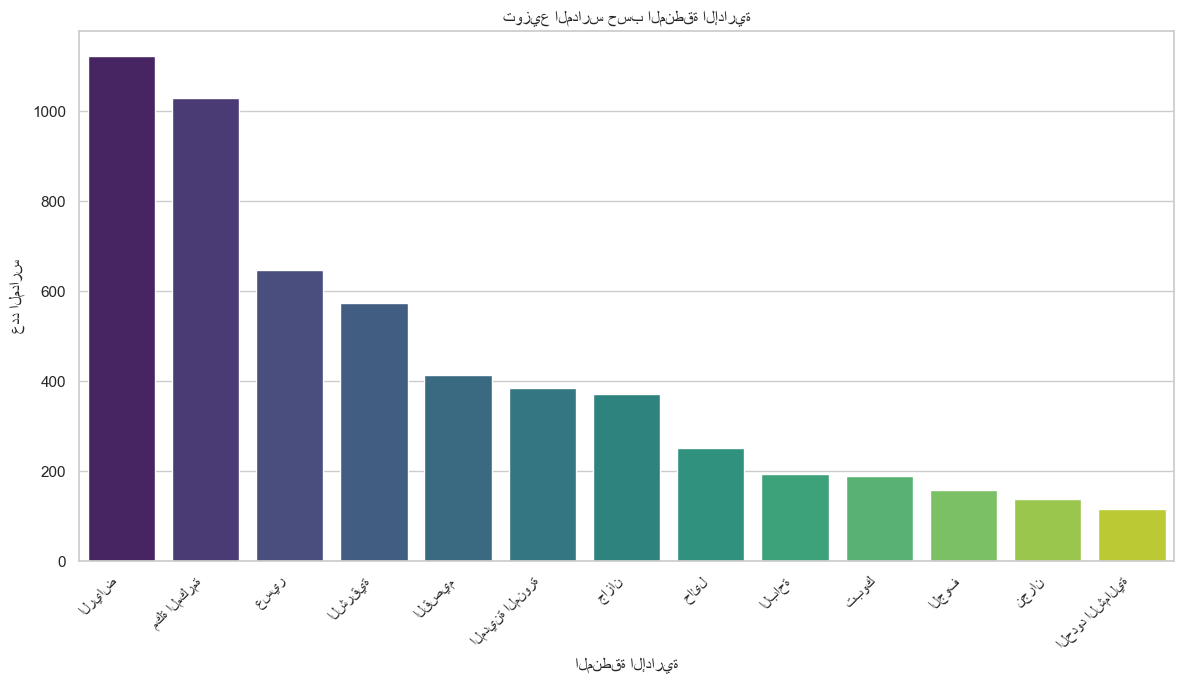

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب عدد المدارس لكل منطقة إدارية
admin_region_counts = df['المنطقة الإدارية'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=admin_region_counts.index, y=admin_region_counts.values, palette='viridis')
plt.title('توزيع المدارس حسب المنطقة الإدارية')
plt.xlabel('المنطقة الإدارية')
plt.ylabel('عدد المدارس')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\381951154.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='plasma')


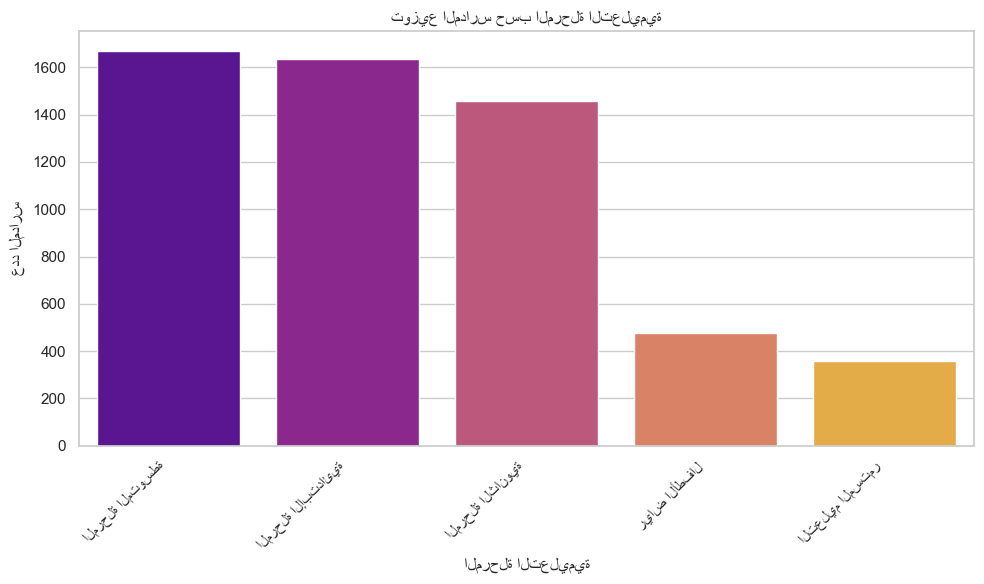

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب عدد المدارس لكل مرحلة تعليمية
stage_counts = df['المرحلة'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='plasma')
plt.title('توزيع المدارس حسب المرحلة التعليمية')
plt.xlabel('المرحلة التعليمية')
plt.ylabel('عدد المدارس')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

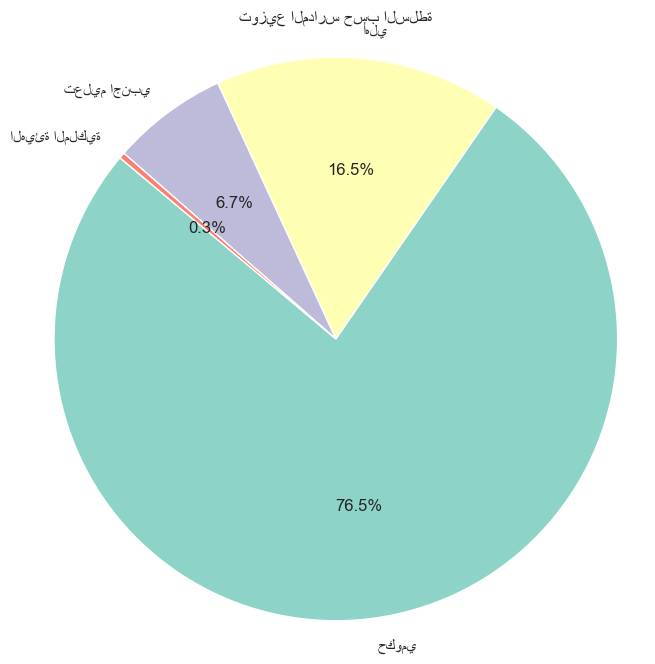

In [54]:
import matplotlib.pyplot as plt

# حساب عدد المدارس لكل سلطة (حكومي، أهلي، إلخ)
authority_counts = df['السلطة'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(authority_counts, labels=authority_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('توزيع المدارس حسب السلطة')
plt.axis('equal') # يضمن أن الدائرة تكون متساوية
plt.show()

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\2194308010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


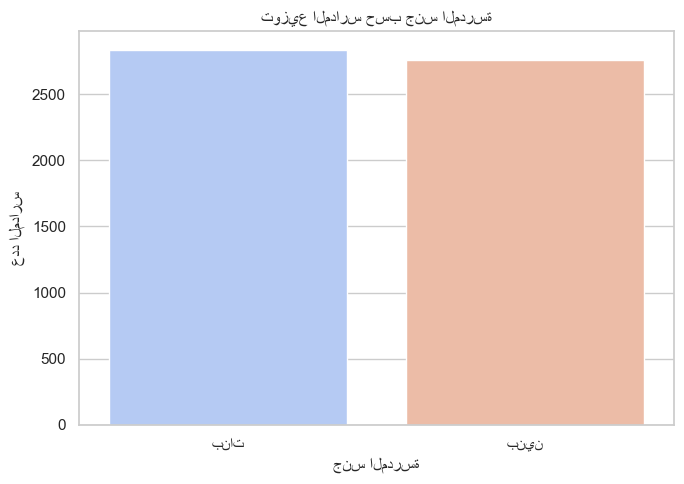

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب عدد المدارس حسب جنس المدرسة
gender_counts = df['جنس المدرسة'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('توزيع المدارس حسب جنس المدرسة')
plt.xlabel('جنس المدرسة')
plt.ylabel('عدد المدارس')
plt.tight_layout()
plt.show()

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\2885095168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_saudi_student_ratio.index, y=avg_saudi_student_ratio.values, palette='mako')


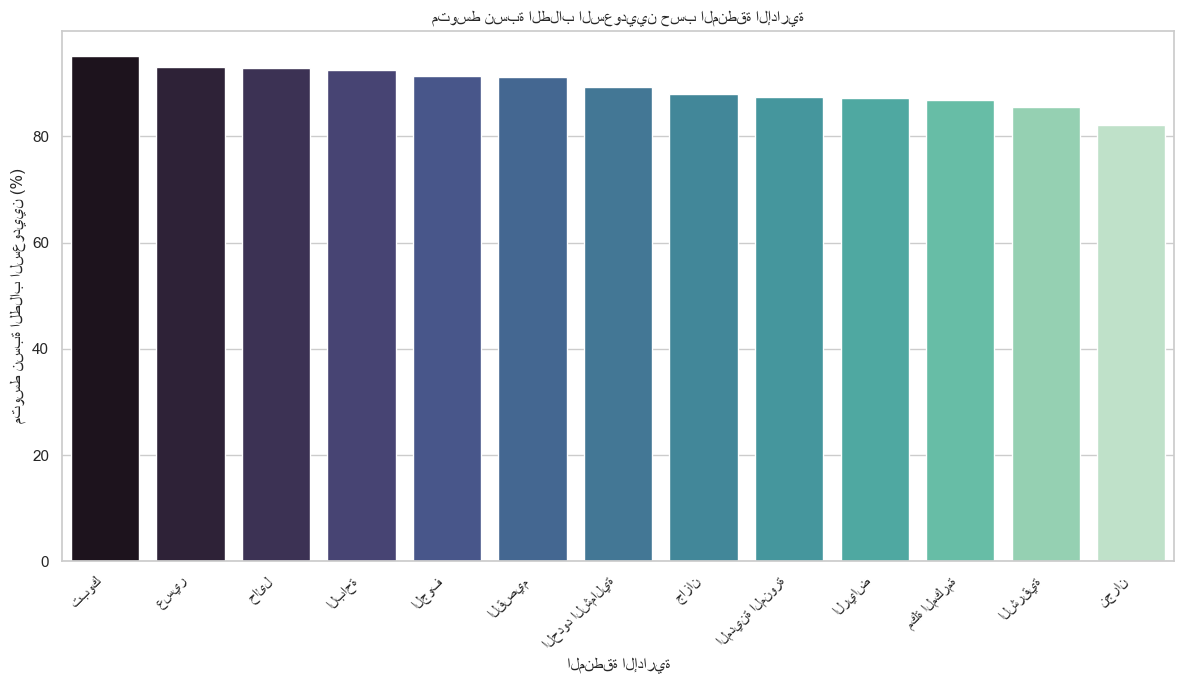

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب متوسط نسبة الطلاب السعوديين لكل منطقة إدارية
avg_saudi_student_ratio = df.groupby('المنطقة الإدارية')['نسبة الطلاب السعوديين'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_saudi_student_ratio.index, y=avg_saudi_student_ratio.values, palette='mako')
plt.title('متوسط نسبة الطلاب السعوديين حسب المنطقة الإدارية')
plt.xlabel('المنطقة الإدارية')
plt.ylabel('متوسط نسبة الطلاب السعوديين (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\2166238573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_saudi_teacher_ratio.index, y=avg_saudi_teacher_ratio.values, palette='rocket')


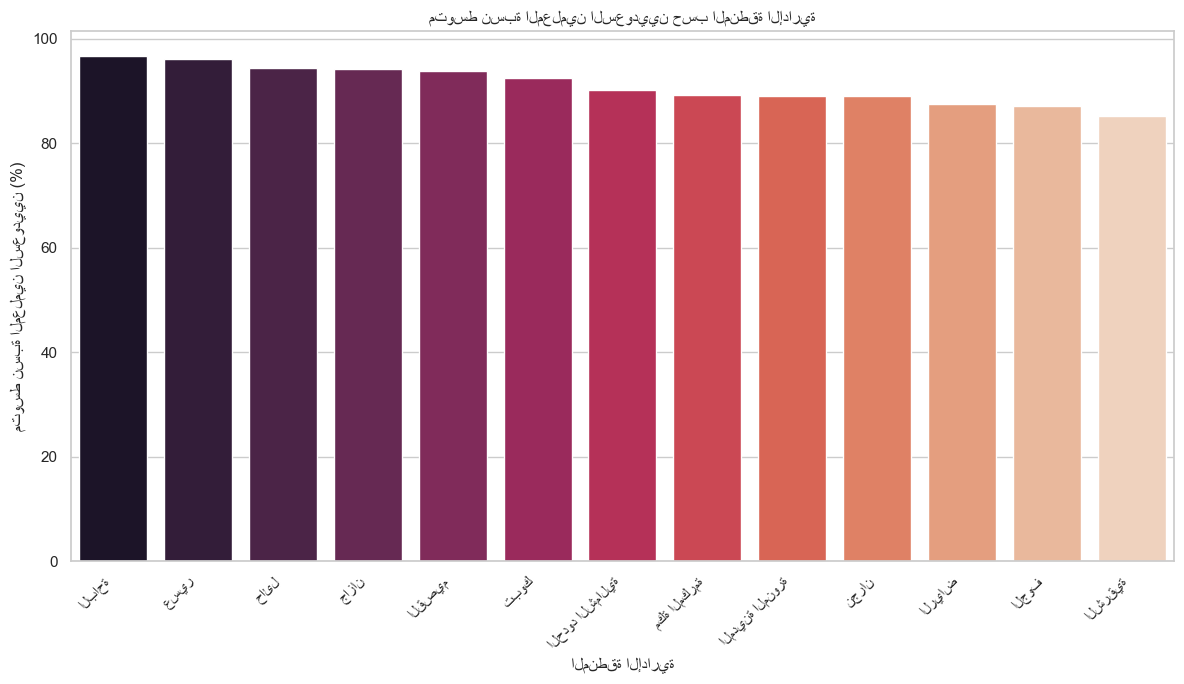

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب متوسط نسبة المعلمين السعوديين لكل منطقة إدارية
avg_saudi_teacher_ratio = df.groupby('المنطقة الإدارية')['نسبة المعلمين السعوديين'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_saudi_teacher_ratio.index, y=avg_saudi_teacher_ratio.values, palette='rocket')
plt.title('متوسط نسبة المعلمين السعوديين حسب المنطقة الإدارية')
plt.xlabel('المنطقة الإدارية')
plt.ylabel('متوسط نسبة المعلمين السعوديين (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

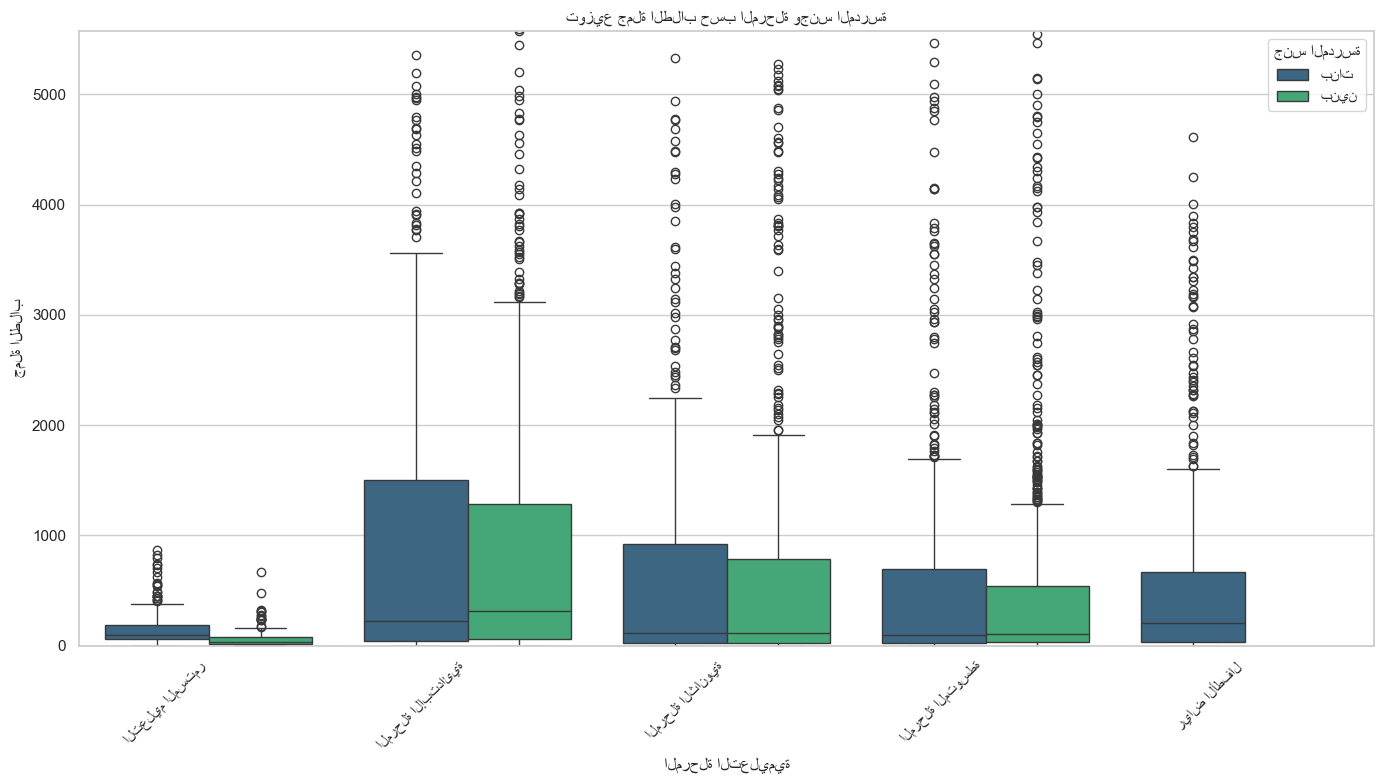

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='المرحلة', y='جملة طلاب', hue='جنس المدرسة', data=df, palette='viridis')
plt.title('توزيع جملة الطلاب حسب المرحلة وجنس المدرسة')
plt.xlabel('المرحلة التعليمية')
plt.ylabel('جملة الطلاب')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df['جملة طلاب'].quantile(0.95)) # للتحكم في القيم المتطرفة وعرض أفضل
plt.tight_layout()
plt.show()

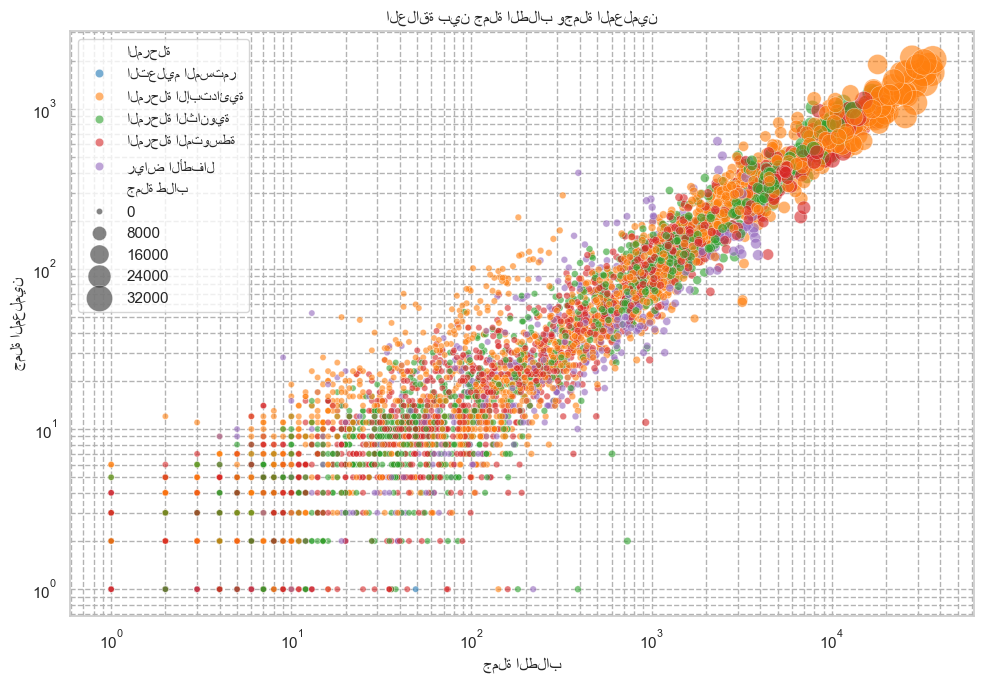

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='جملة طلاب', y='جملة معلمين', data=df, hue='المرحلة', size='جملة طلاب', sizes=(20, 400), alpha=0.6, palette='tab10')
plt.title('العلاقة بين جملة الطلاب وجملة المعلمين')
plt.xlabel('جملة الطلاب')
plt.ylabel('جملة المعلمين')
plt.xscale('log') # استخدام مقياس لوغاريتمي للمحور السيني لتحسين العرض مع وجود قيم متطرفة
plt.yscale('log') # استخدام مقياس لوغاريتمي للمحور الصادي لتحسين العرض مع وجود قيم متطرفة
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

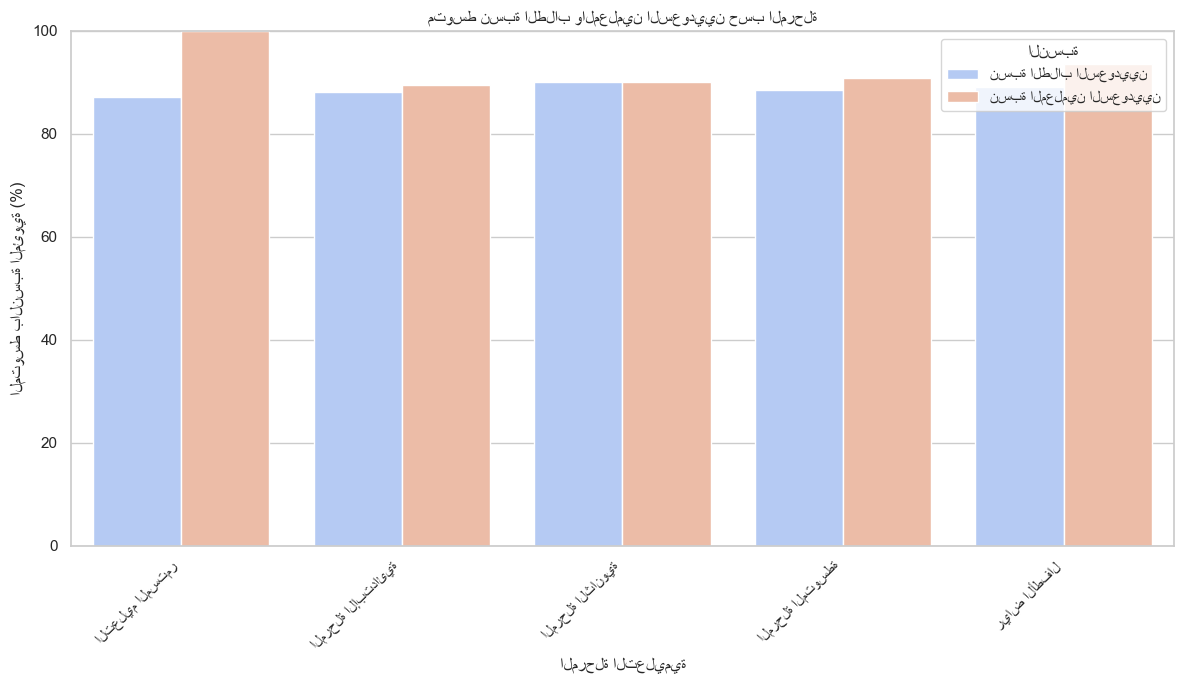

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# حساب متوسط النسبتين لكل مرحلة
avg_ratios_by_stage = df.groupby('المرحلة')[['نسبة الطلاب السعوديين', 'نسبة المعلمين السعوديين']].mean().reset_index()

# تحويل البيانات إلى تنسيق طويل لتسهيل الرسم باستخدام seaborn
avg_ratios_melted = avg_ratios_by_stage.melt(id_vars='المرحلة', var_name='النسبة', value_name='المتوسط')

plt.figure(figsize=(12, 7))
sns.barplot(x='المرحلة', y='المتوسط', hue='النسبة', data=avg_ratios_melted, palette='coolwarm')
plt.title('متوسط نسبة الطلاب والمعلمين السعوديين حسب المرحلة')
plt.xlabel('المرحلة التعليمية')
plt.ylabel('المتوسط بالنسبة المئوية (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

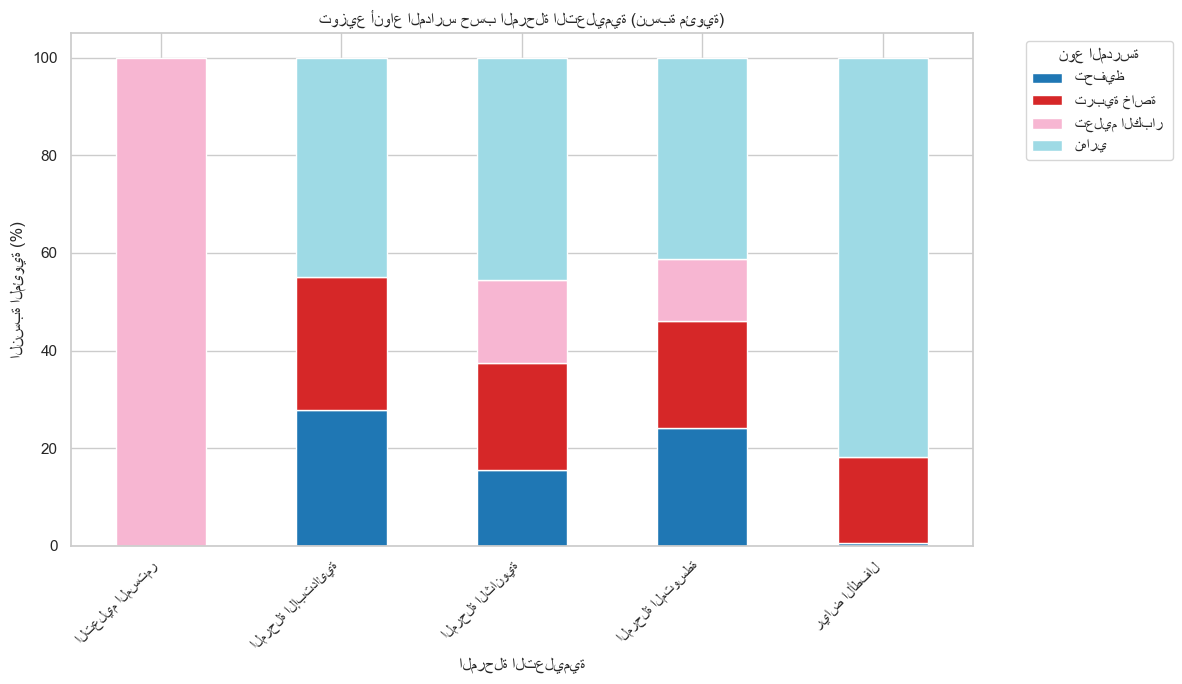

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# إنشاء جدول تكراري لنوع المدرسة والمرحلة
cross_tab = pd.crosstab(df['المرحلة'], df['نوع المدرسة'])

# تحويل التكرارات إلى نسب مئوية لكل مرحلة
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

cross_tab_percent.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('توزيع أنواع المدارس حسب المرحلة التعليمية (نسبة مئوية)')
plt.xlabel('المرحلة التعليمية')
plt.ylabel('النسبة المئوية (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='نوع المدرسة', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

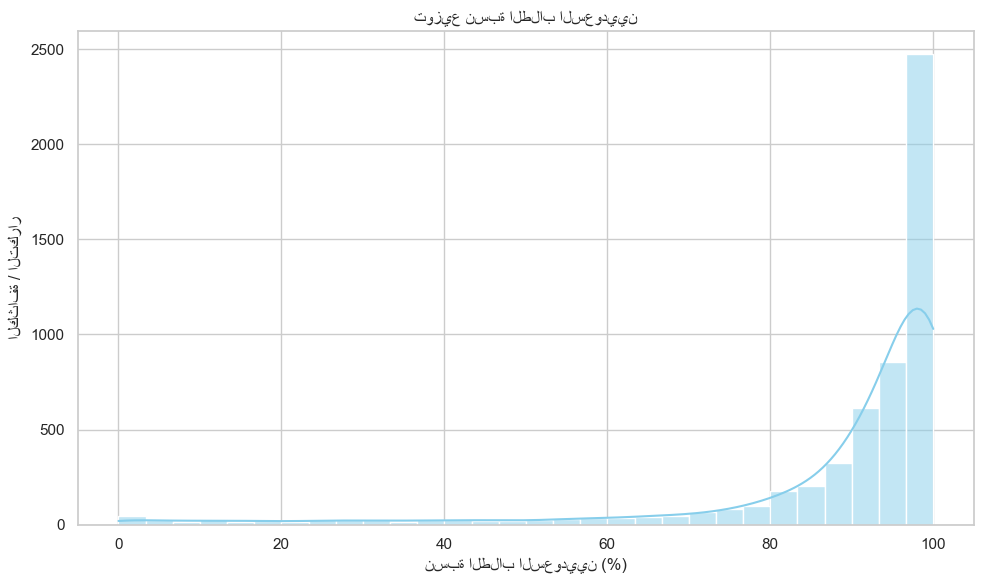

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['نسبة الطلاب السعوديين'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('توزيع نسبة الطلاب السعوديين')
plt.xlabel('نسبة الطلاب السعوديين (%)')
plt.ylabel('الكثافة / التكرار')
plt.tight_layout()
plt.show()

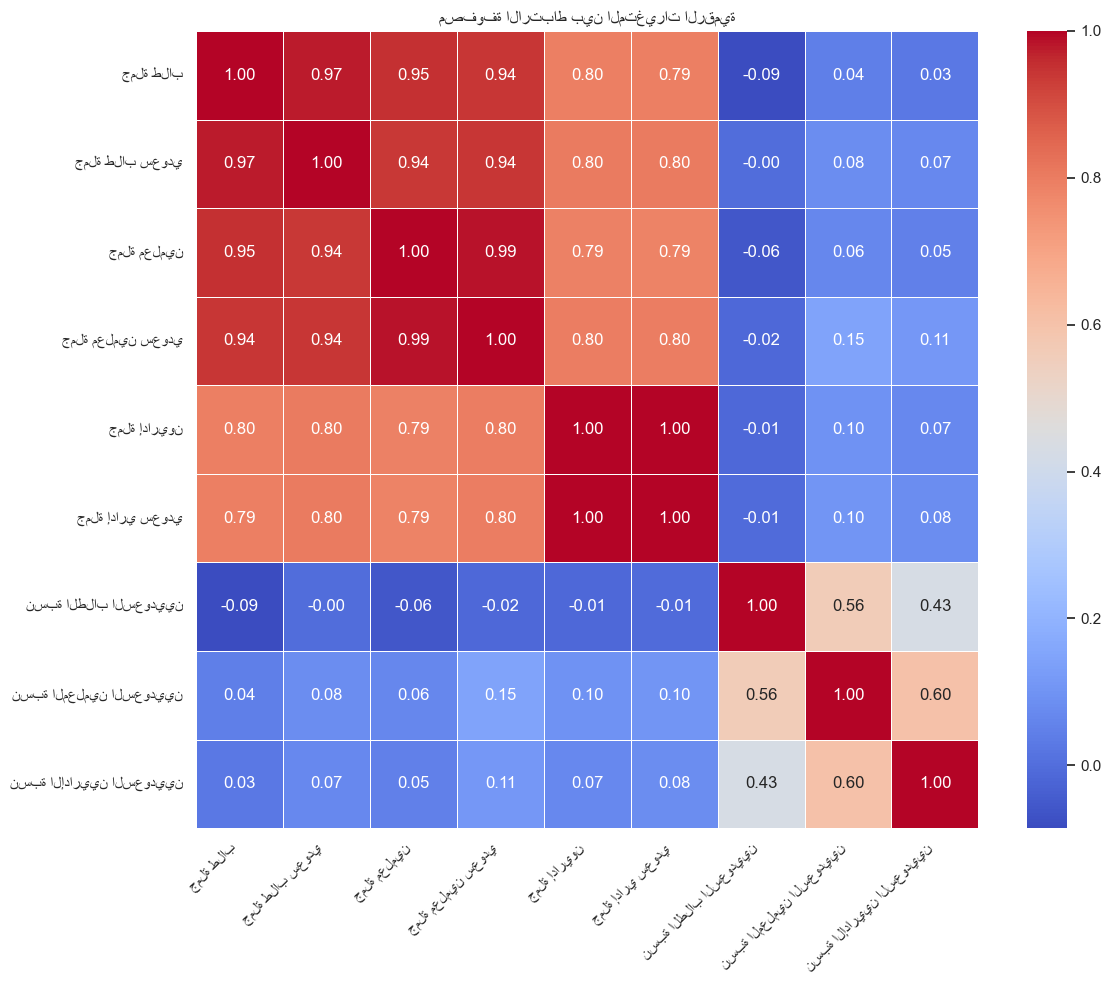

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# اختيار الأعمدة الرقمية ذات الاهتمام
numeric_cols = ['جملة طلاب', 'جملة طلاب سعودي', 'جملة معلمين', 'جملة معلمين سعودي',
                'جملة إداريون', 'جملة إداري سعودي',
                'نسبة الطلاب السعوديين', 'نسبة المعلمين السعوديين', 'نسبة الإداريين السعوديين']

# حساب مصفوفة الارتباط
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('مصفوفة الارتباط بين المتغيرات الرقمية')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\1401679895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='المنطقة الإدارية', y='نسبة الطلاب السعوديين', data=df, palette='Spectral')


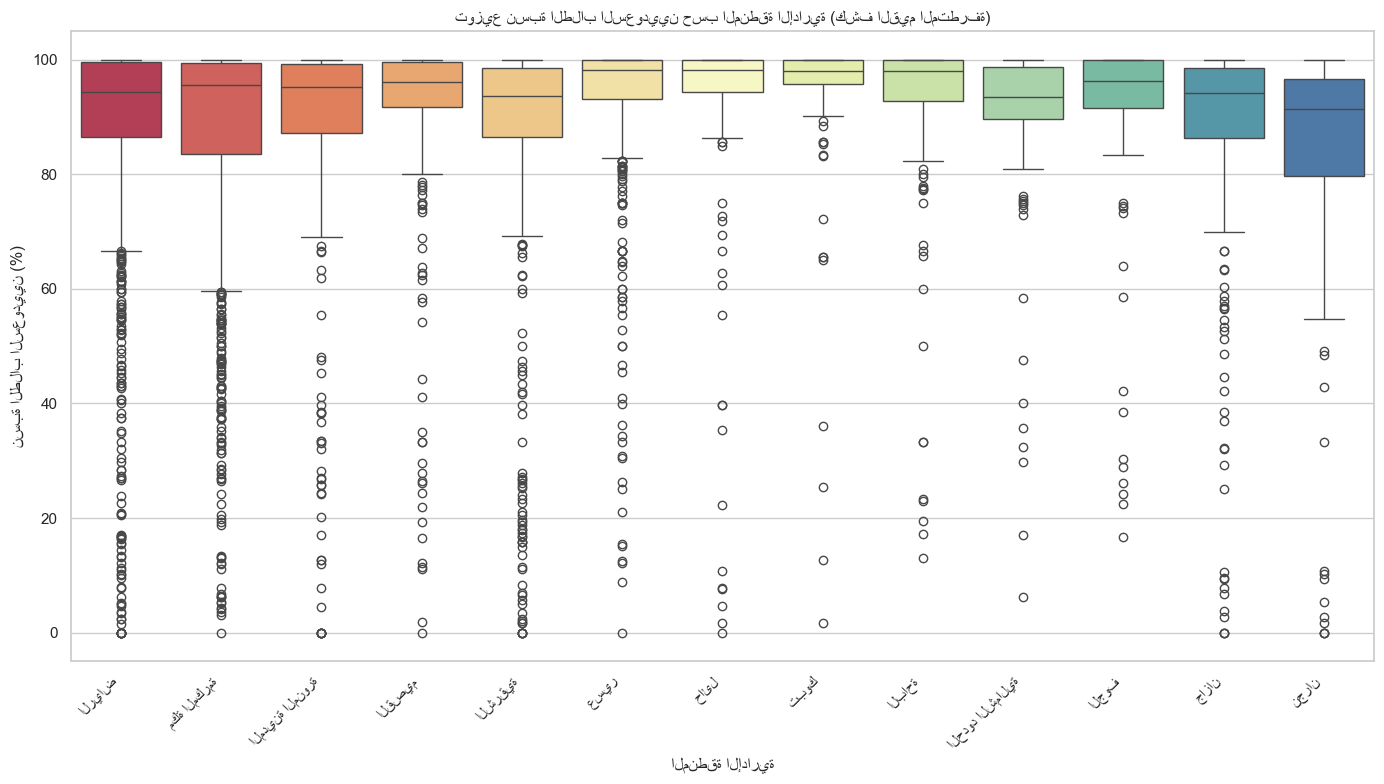

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='المنطقة الإدارية', y='نسبة الطلاب السعوديين', data=df, palette='Spectral')
plt.title('توزيع نسبة الطلاب السعوديين حسب المنطقة الإدارية (كشف القيم المتطرفة)')
plt.xlabel('المنطقة الإدارية')
plt.ylabel('نسبة الطلاب السعوديين (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
from scipy import stats
import pandas as pd

# تجميع النسب حسب المرحلة وإزالة القيم المفقودة
groups = df.groupby('المرحلة')['نسبة المعلمين السعوديين'].apply(lambda x: x.dropna().tolist())

# التأكد من وجود أكثر من مجموعة واحدة وإلا لن يعمل ANOVA
if len(groups) > 1:
    # نقوم بتحويل كل مجموعة إلى قائمة
    f_statistic, p_value = stats.f_oneway(*groups)

    print(f"إحصائية F لاختبار ANOVA: {f_statistic:.2f}")
    print(f"قيمة P لاختبار ANOVA: {p_value:.3f}")

    if p_value < 0.05:
        print("\nتوجد فروق ذات دلالة إحصائية في متوسط نسبة المعلمين السعوديين بين المراحل التعليمية المختلفة.")
    else:
        print("\nلا توجد فروق ذات دلالة إحصائية في متوسط نسبة المعلمين السعوديين بين المراحل التعليمية المختلفة.")
else:
    print("عدد المجموعات غير كافٍ لإجراء تحليل ANOVA.")

إحصائية F لاختبار ANOVA: 2.82
قيمة P لاختبار ANOVA: 0.024

توجد فروق ذات دلالة إحصائية في متوسط نسبة المعلمين السعوديين بين المراحل التعليمية المختلفة.


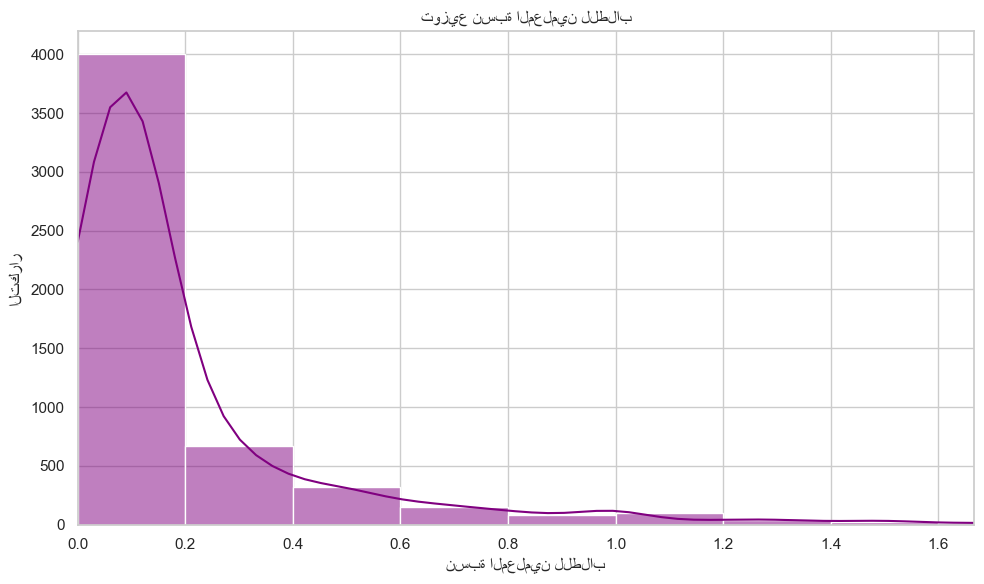

C:\Users\PCD\AppData\Local\Temp\ipykernel_58204\2126563080.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='المرحلة', y='نسبة المعلمين للطلاب', data=df, palette='cool')


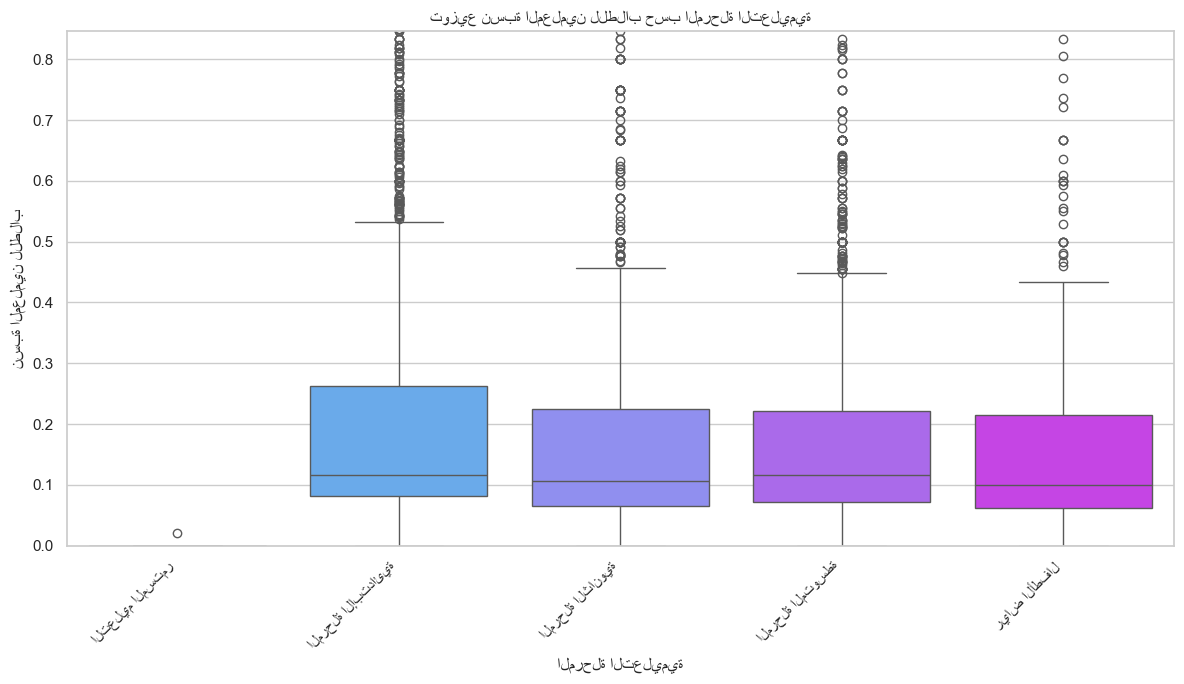

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# حساب نسبة المعلمين للطلاب
# نتجنب القسمة على صفر بوضع NaN حيث عدد الطلاب صفر
df['نسبة المعلمين للطلاب'] = np.where(
    df['جملة طلاب'] > 0,
    df['جملة معلمين'].astype(float) / df['جملة طلاب'],
    np.nan
)

# يمكننا الآن تصور توزيع هذه النسبة
plt.figure(figsize=(10, 6))
sns.histplot(df['نسبة المعلمين للطلاب'].dropna(), kde=True, bins=30, color='purple')
plt.title('توزيع نسبة المعلمين للطلاب')
plt.xlabel('نسبة المعلمين للطلاب')
plt.ylabel('التكرار')
plt.xlim(0, df['نسبة المعلمين للطلاب'].quantile(0.99)) # تحديد نطاق العرض للقيم الشائعة
plt.tight_layout()
plt.show()

# يمكننا أيضًا مقارنة هذه النسبة حسب المرحلة
plt.figure(figsize=(12, 7))
sns.boxplot(x='المرحلة', y='نسبة المعلمين للطلاب', data=df, palette='cool')
plt.title('توزيع نسبة المعلمين للطلاب حسب المرحلة التعليمية')
plt.xlabel('المرحلة التعليمية')
plt.ylabel('نسبة المعلمين للطلاب')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df['نسبة المعلمين للطلاب'].quantile(0.95)) # للتحكم في القيم المتطرفة
plt.tight_layout()
plt.show()

C:\Users\PCD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


توزيع المدارس حسب المجموعات (3 مجموعات):
Cluster
0    2611
2     369
1     232
Name: count, dtype: int64

متوسطات خصائص المجموعات:
            جملة طلاب  جملة معلمين  نسبة الطلاب السعوديين  \
Cluster                                                     
0          992.608579    97.388740              93.456327   
1        12760.193966   837.112069              81.779310   
2         1245.718157    94.149051              50.652873   

         نسبة المعلمين السعوديين  نسبة الإداريين السعوديين  
Cluster                                                     
0                      97.699671                 99.834267  
1                      98.238362                 99.613966  
2                      34.676233                 69.033415  


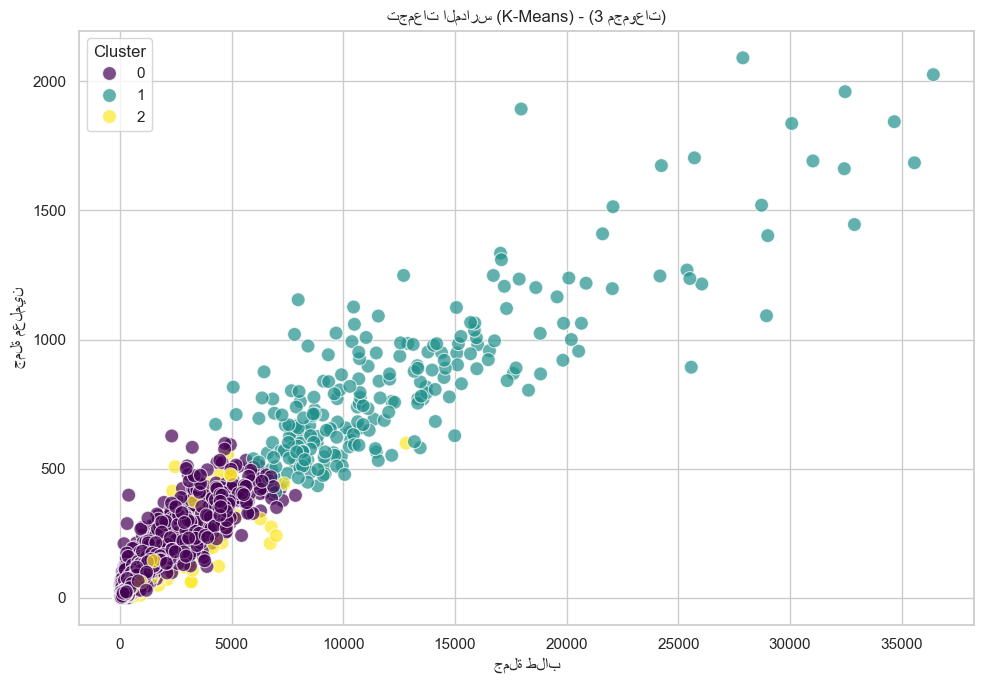

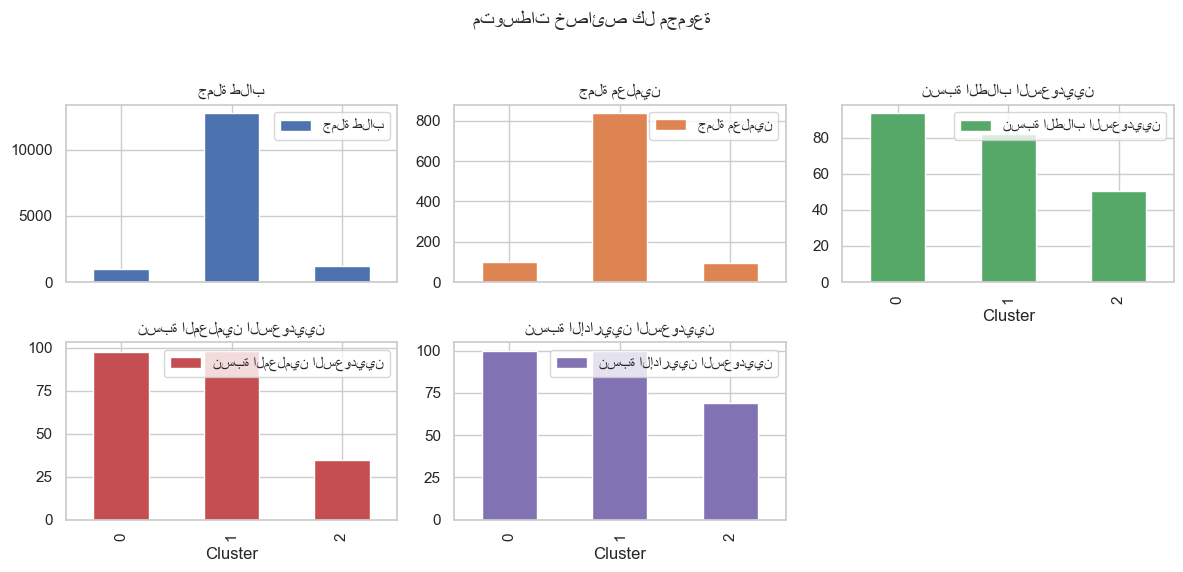

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# اختيار المتغيرات للتحليل التجميعي (يمكنك إضافة المزيد أو تغييرها)
features = ['جملة طلاب', 'جملة معلمين', 'نسبة الطلاب السعوديين', 'نسبة المعلمين السعوديين', 'نسبة الإداريين السعوديين']

# إزالة الصفوف التي تحتوي على قيم مفقودة في المتغيرات المختارة
df_clustering = df[features].dropna().copy()

# توحيد المتغيرات (Scaling) ضروري لمعظم خوارزميات التجميع
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(scaled_features, columns=features, index=df_clustering.index)

# تحديد العدد الأمثل للمجموعات (باستخدام طريقة الكوع - Elbow Method مثلاً)
# هذا الجزء قد يحتاج إلى تعديل بناءً على النتائج المرئية
# سنفترض هنا 3 مجموعات كبداية (يمكنك تجربة 2 إلى 5 مثلاً)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_clustering['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"توزيع المدارس حسب المجموعات ({num_clusters} مجموعات):")
print(df_clustering['Cluster'].value_counts())

# عرض خصائص كل مجموعة (المتوسطات)
cluster_centers = df_clustering.groupby('Cluster')[features].mean()
print("\nمتوسطات خصائص المجموعات:")
print(cluster_centers)

# التصور: (يمكنك اختيار أي بعدين من المتغيرات لعرض التجمعات)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='جملة طلاب', y='جملة معلمين', hue='Cluster', data=df_clustering, palette='viridis', s=100, alpha=0.7)
plt.title(f'تجمعات المدارس (K-Means) - ({num_clusters} مجموعات)')
plt.xlabel('جملة طلاب')
plt.ylabel('جملة معلمين')
plt.grid(True)
plt.tight_layout()
plt.show()

# تصور آخر لمتوسطات المجموعات
cluster_centers.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(2,3), sharey=False)
plt.suptitle('متوسطات خصائص كل مجموعة')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [94]:
import pandas as pd
import numpy as np

def partial_correlation(data, x_col, y_col, control_cols):
    """
    يحسب الارتباط الجزئي بين متغيرين مع التحكم في متغير أو أكثر.
    يعتمد على مفهوم الانحدار الخطي لإزالة تأثير المتغيرات التحكم.

    الوسائط:
        data (pd.DataFrame): إطار البيانات الذي يحتوي على المتغيرات.
        x_col (str): اسم العمود للمتغير الأول (x).
        y_col (str): اسم العمود للمتغير الثاني (y).
        control_cols (list of str): قائمة بأسماء الأعمدة للمتغيرات التي يتم التحكم فيها.

    العودة:
        float: قيمة الارتباط الجزئي.
    """

    # 1. إزالة القيم المفقودة من جميع الأعمدة المعنية
    cols_to_use = [x_col, y_col] + control_cols
    df_clean = data[cols_to_use].dropna()

    if df_clean.empty:
        print("تحذير: لا توجد بيانات كافية لحساب الارتباط الجزئي بعد إزالة القيم المفقودة.")
        return np.nan

    # 2. إنشاء نموذج انحدار لـ x_col على control_cols
    #    بمعنى آخر، نتوقع x_col باستخدام control_cols
    X_for_x = sm.add_constant(df_clean[control_cols])
    y_for_x = df_clean[x_col]
    model_x = sm.OLS(y_for_x, X_for_x).fit()
    residuals_x = model_x.resid # البواقي هي الجزء من x_col الذي لا يتم تفسيره بواسطة control_cols

    # 3. إنشاء نموذج انحدار لـ y_col على control_cols
    #    بمعنى آخر، نتوقع y_col باستخدام control_cols
    X_for_y = sm.add_constant(df_clean[control_cols])
    y_for_y = df_clean[y_col]
    model_y = sm.OLS(y_for_y, X_for_y).fit()
    residuals_y = model_y.resid # البواقي هي الجزء من y_col الذي لا يتم تفسيره بواسطة control_cols

    # 4. حساب الارتباط بين البواقي
    #    هذا هو الارتباط الجزئي
    partial_corr_value = residuals_x.corr(residuals_y)

    return partial_corr_value

# استخدام الدالة:
# لنفترض أننا نريد معرفة الارتباط بين جملة طلاب وجملة معلمين، مع التحكم في نسبة الطلاب السعوديين
# يجب أن يكون عمود 'نسبة الطلاب السعوديين' رقميًا
df['نسبة الطلاب السعوديين'] = pd.to_numeric(df['نسبة الطلاب السعوديين'], errors='coerce') # للتأكد

# استدعاء الدالة
pcorr_value = partial_correlation(
    data=df,
    x_col='جملة طلاب',
    y_col='جملة معلمين',
    control_cols=['نسبة الطلاب السعوديين']
)

print(f"\nالارتباط الجزئي بين 'جملة طلاب' و 'جملة معلمين' (بالتحكم في 'نسبة الطلاب السعوديين'): {pcorr_value:.4f}")


الارتباط الجزئي بين 'جملة طلاب' و 'جملة معلمين' (بالتحكم في 'نسبة الطلاب السعوديين'): 0.9524


In [90]:
import pandas as pd
from scipy.stats import chi2_contingency

# إنشاء جدول التوافق (Contingency Table)
contingency_table = pd.crosstab(df['جنس المدرسة'], df['السلطة'])

print("جدول التوافق بين جنس المدرسة والسلطة:")
print(contingency_table)

# إجراء اختبار Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nإحصائية Chi-Square: {chi2:.2f}")
print(f"قيمة P: {p_value:.3f}")
print(f"درجات الحرية (Degrees of Freedom): {dof}")

if p_value < 0.05:
    print("\nتوجد علاقة ذات دلالة إحصائية بين جنس المدرسة والسلطة.")
else:
    print("\nلا توجد علاقة ذات دلالة إحصائية بين جنس المدرسة والسلطة.")

جدول التوافق بين جنس المدرسة والسلطة:
السلطة       أهلي  الهيئة الملكية  تعليم اجنبي  حكومي
جنس المدرسة                                          
بنات          518               0          204   2114
بنين          406              19          169   2167

إحصائية Chi-Square: 35.52
قيمة P: 0.000
درجات الحرية (Degrees of Freedom): 3

توجد علاقة ذات دلالة إحصائية بين جنس المدرسة والسلطة.
